In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [56]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [58]:
# loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 69079 files belonging to 37 classes.


In [59]:
# loading training set
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/valid/',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 17068 files belonging to 37 classes.


In [60]:
class_names = training_ds.class_names
print(class_names)

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [10]:
class_names = validation_ds.class_names
print(class_names)

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


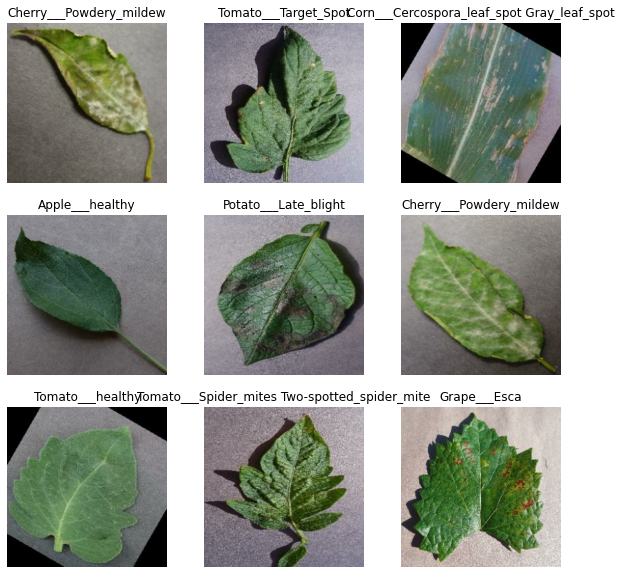

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in validation_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
# ## Defining Cnn
# classifier = tf.keras.models.Sequential([
#   layers.BatchNormalization(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(len(class_names), activation= 'softmax')
# ])

In [26]:
# classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
# ## lets train our CNN
# retVal = classifier.fit(training_ds, validation_data= validation_ds, epochs = 20)

# App model

In [ ]:
image_size = 250

model0 = tf.keras.models.Sequential([
  layers.Conv2D(32, 3, activation='relu',input_shape=(image_size, image_size, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(len(class_names), activation= 'softmax')
])

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history0 = model0.fit(training_ds, validation_data = validation_ds, batch_size = 32, epochs = 10, callbacks = [early])

Epoch 1/10
691/691 [==============================] - 4668s 7s/step - loss: 20.6775 - accuracy: 0.1890 - val_loss: 1.3404 - val_accuracy: 0.6151
Epoch 2/10
156/691 [=====>........................] - ETA: 1:00:04 - loss: 1.3177 - accuracy: 0.6104

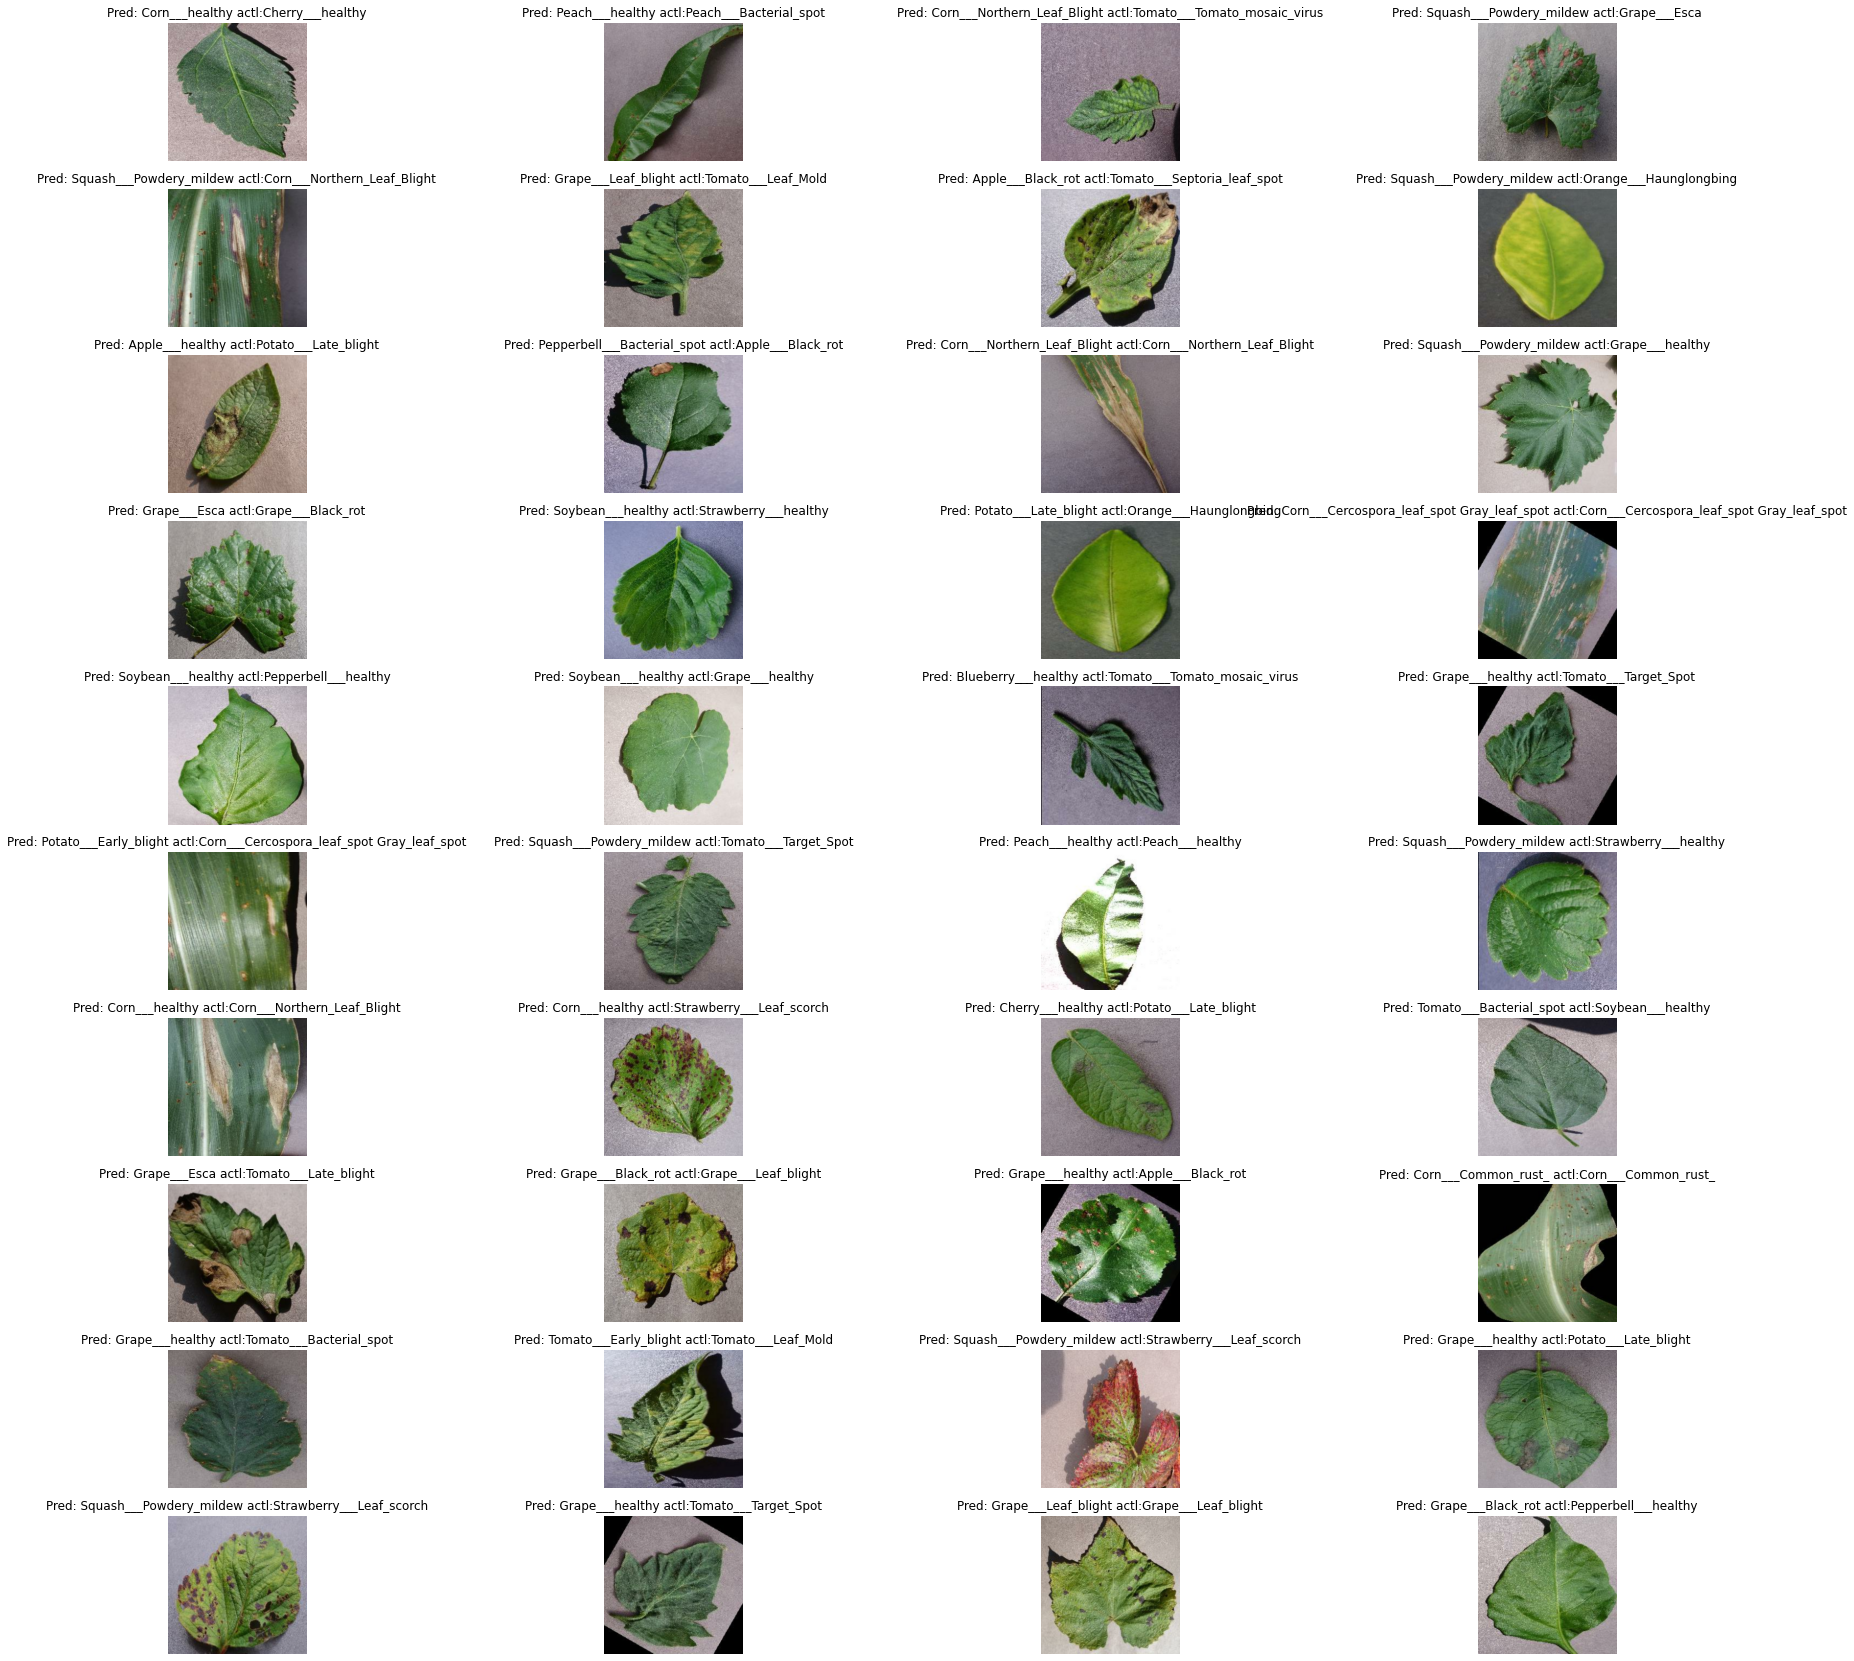

In [66]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model0.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [44]:
model = tf.keras.models.load_model('./model/classifier2.h5') #UNCOMMENT TO LOAD MODEL

In [50]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image, label = load('./dataset/valid/Corn___Common_rust_/RS_Rust 1625_flipLR.JPG')
image_pred = model.predict(image)
image_pred = np.argmax(image_pred)

ValueError: not enough values to unpack (expected 2, got 1)

In [40]:
image_pred

8

In [49]:
images = load('./dataset/valid/Corn___Common_rust_/RS_Rust 1625_flipLR.JPG')
predictions = model.predict(images)
# predlabel = []
# prdlbl = []

# for mem in predictions:
#     predlabel.append(class_names[np.argmax(mem)])
#     prdlbl.append(np.argmax(mem))

# AccuracyVector = np.array(prdlbl) == labels

ValueError: in user code:

    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 107648 but received input with shape (None, 86528)


In [47]:
prdlbl

[28,
 17,
 14,
 29,
 3,
 4,
 10,
 0,
 13,
 12,
 17,
 26,
 20,
 36,
 32,
 36,
 2,
 8,
 36,
 23,
 0,
 9,
 33,
 26,
 3,
 1,
 1,
 13,
 4,
 34,
 4,
 4,
 31,
 21,
 10,
 5,
 35,
 28,
 8,
 12,
 22,
 20,
 20,
 4,
 24,
 15,
 8,
 25,
 7,
 11,
 32,
 23,
 24,
 33,
 16,
 18,
 14,
 4,
 25,
 36,
 5,
 10,
 6,
 18,
 13,
 8,
 7,
 24,
 34,
 11,
 2,
 12,
 7,
 20,
 18,
 5,
 35,
 0,
 24,
 25,
 23,
 36,
 23,
 30,
 23,
 12,
 33,
 8,
 33,
 3,
 4,
 18,
 11,
 4,
 8,
 1,
 7,
 15,
 29,
 9]

In [3]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

TypeError: 'NoneType' object is not subscriptable

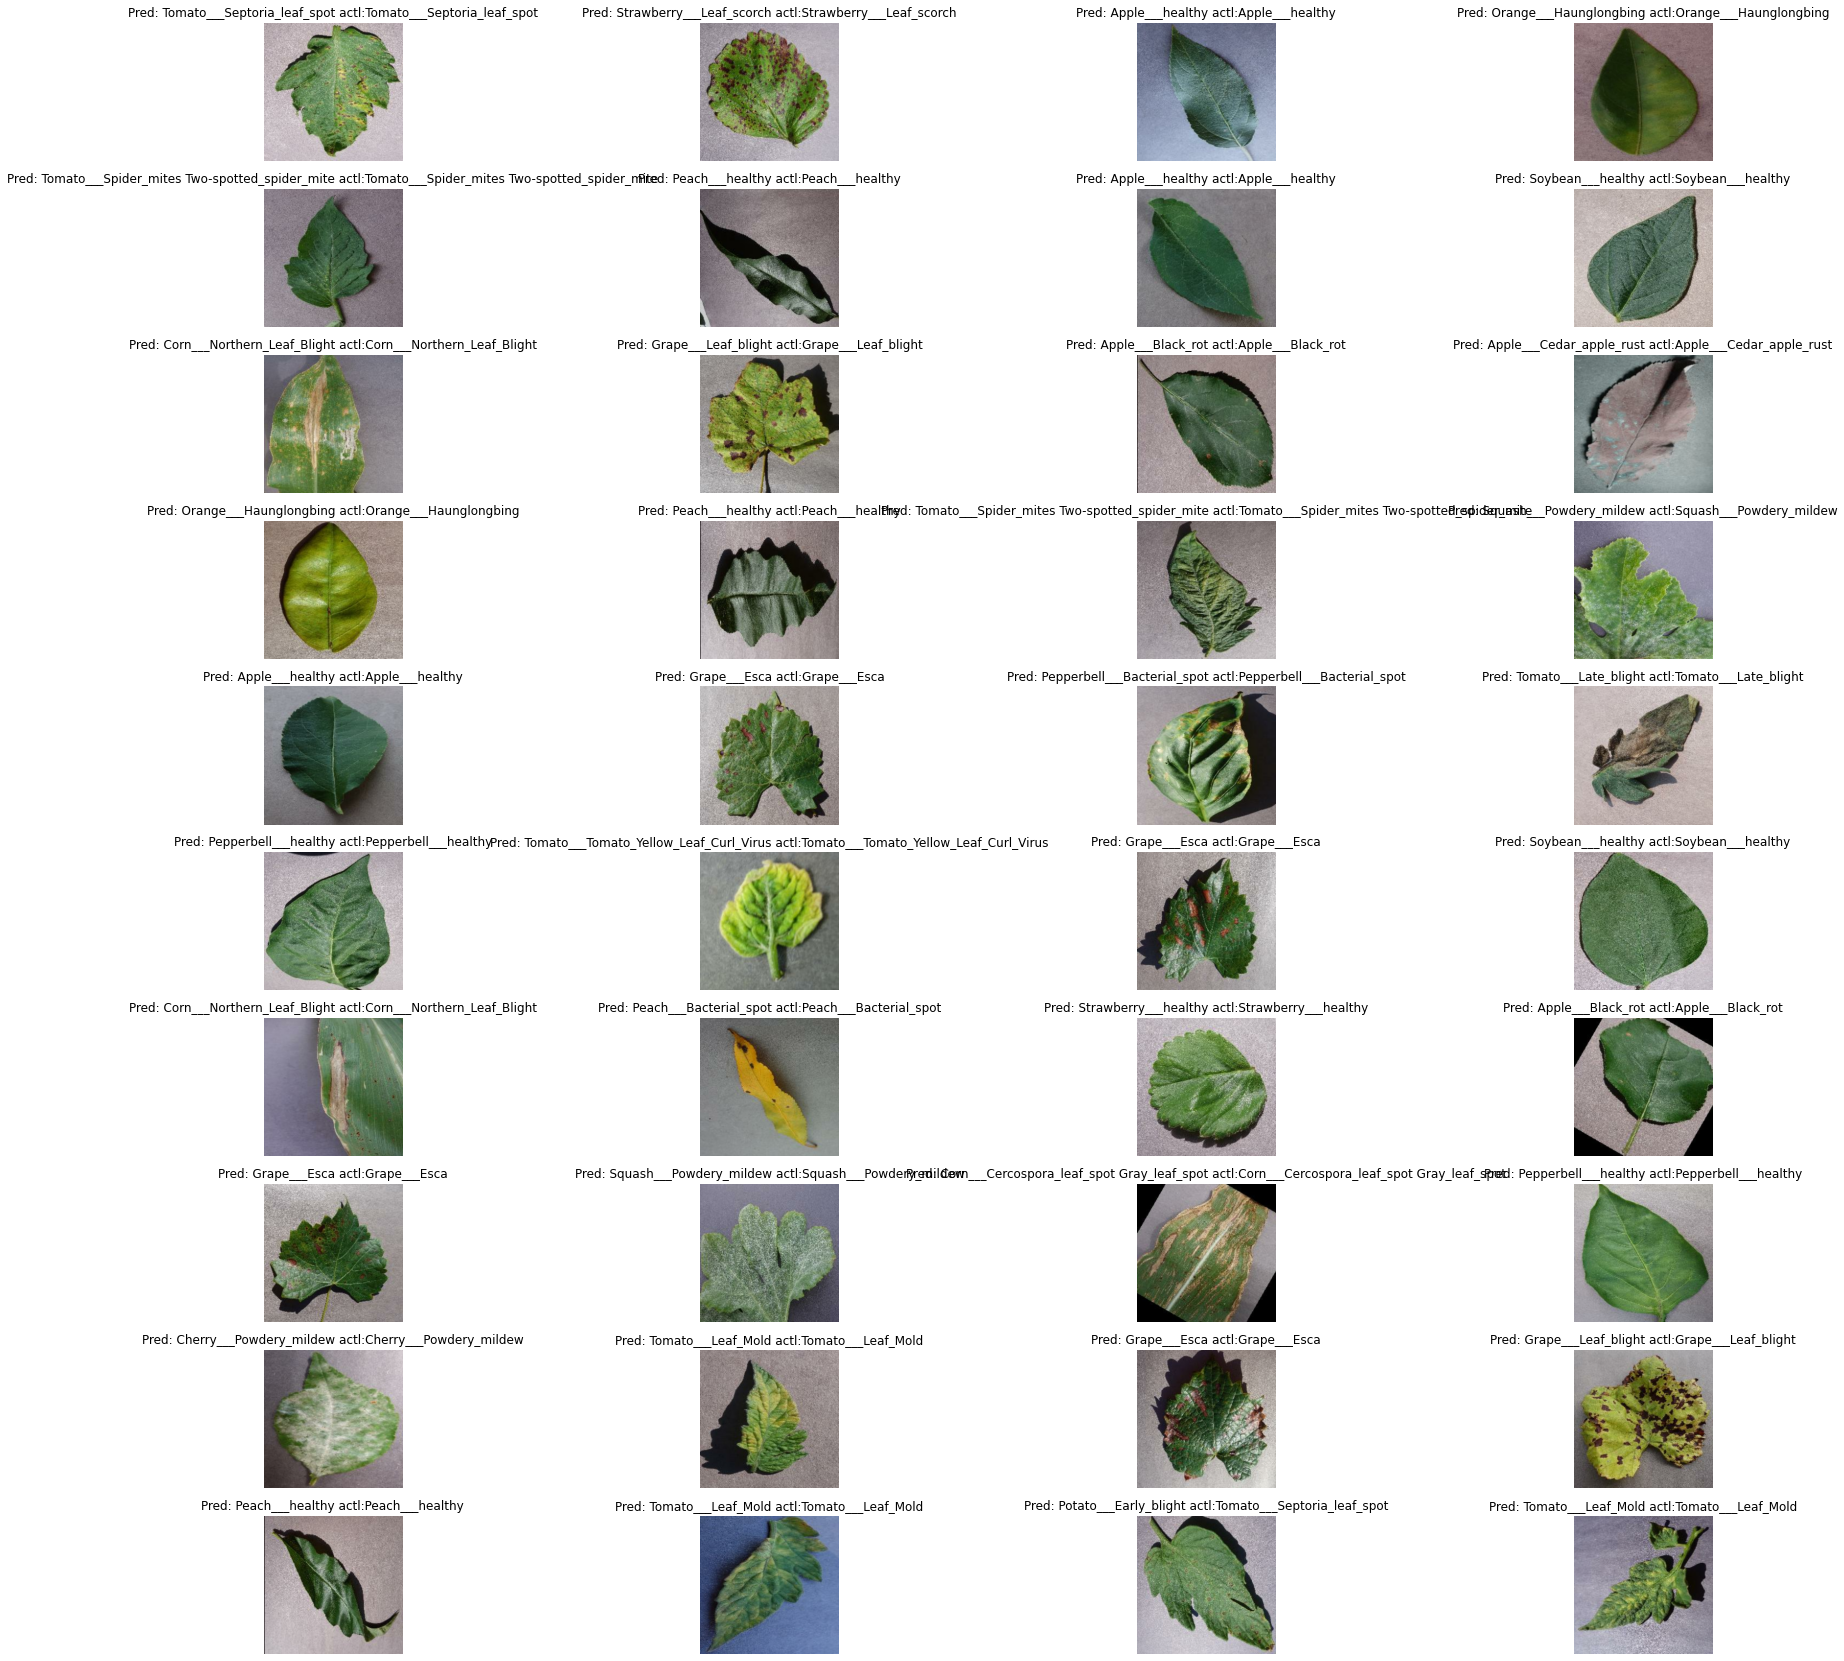

In [12]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [16]:
validation_ds.take(1)

<TakeDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
model.predict()

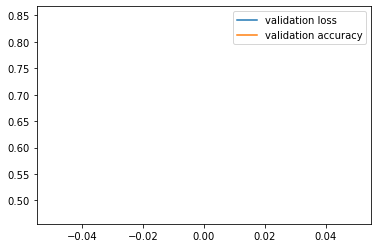

In [20]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [21]:
classifier.save('./models/classifier.h5')

In [18]:
#####################################################################
# lets now see time taken and validation accuracy and model size    #
#####################################################################
start = perf_counter() 
_, unPrunnedAccuracy = MyCnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizeUnprunned = os.path.getsize('model.h5')
# let convert to MB
sizeUnprunned = sizeUnprunned / (1024 * 1024)

print ('unPrunned model Summary:')
print('Model size(MB) : {}'.format(sizeUnprunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(unPrunnedAccuracy))

unPrunned model Summary:
Model size(MB) : 316.51051330566406
Time on Validation data (sec) : 18.235865999999987
Accuracy on validation data: 0.5385385155677795


In [19]:
########################################################################
# lets now implement weight prunning                                   #
########################################################################
!pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

epochs = 5
end_step = np.ceil(70295 / batch_size).astype(np.int32) * epochs
## pruning param
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50, final_sparsity=0.80, begin_step=0, end_step=end_step)
                }
## defining prunned model
MyPrunnedModel = prune_low_magnitude(MyCnn, **pruning_params)
MyPrunnedModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [20]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir='.'),
]
retVal = MyPrunnedModel.fit(training_ds,validation_data= validation_ds,epochs = 5 ,callbacks= callbacks)

Epoch 1/5
45/45 [==============================] - 344s 7s/step - loss: 0.3912 - accuracy: 0.8587 - val_loss: 0.2588 - val_accuracy: 0.8929
Epoch 2/5
45/45 [==============================] - 340s 8s/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 0.1298 - val_accuracy: 0.9530
Epoch 3/5
45/45 [==============================] - 352s 8s/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 4/5
45/45 [==============================] - 332s 7s/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0171 - val_accuracy: 0.9920
Epoch 5/5
45/45 [==============================] - 349s 8s/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0116 - val_accuracy: 0.9960


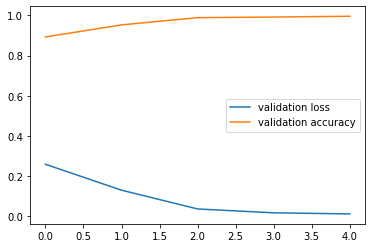

In [21]:
#################################################################
# let Benmark this as above                                     #
#################################################################
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

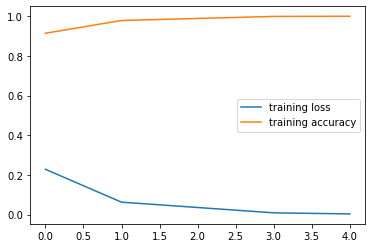

In [22]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [23]:
MyPrunnedModel.save('Prunnedmodel.h5')

In [24]:
start = perf_counter() 
_, PrunnedAccuracy = MyPrunnedModel.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizePrunned = os.path.getsize('Prunnedmodel.h5')
# let convert to MB
sizePrunned = sizePrunned / (1024 * 1024)

print ('Prunned model Summary:')
print('Model size(MB) : {}'.format(sizePrunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(PrunnedAccuracy))

Prunned model Summary:
Model size(MB) : 422.01830291748047
Time on Validation data (sec) : 17.077646699999605
Accuracy on validation data: 0.9959959983825684


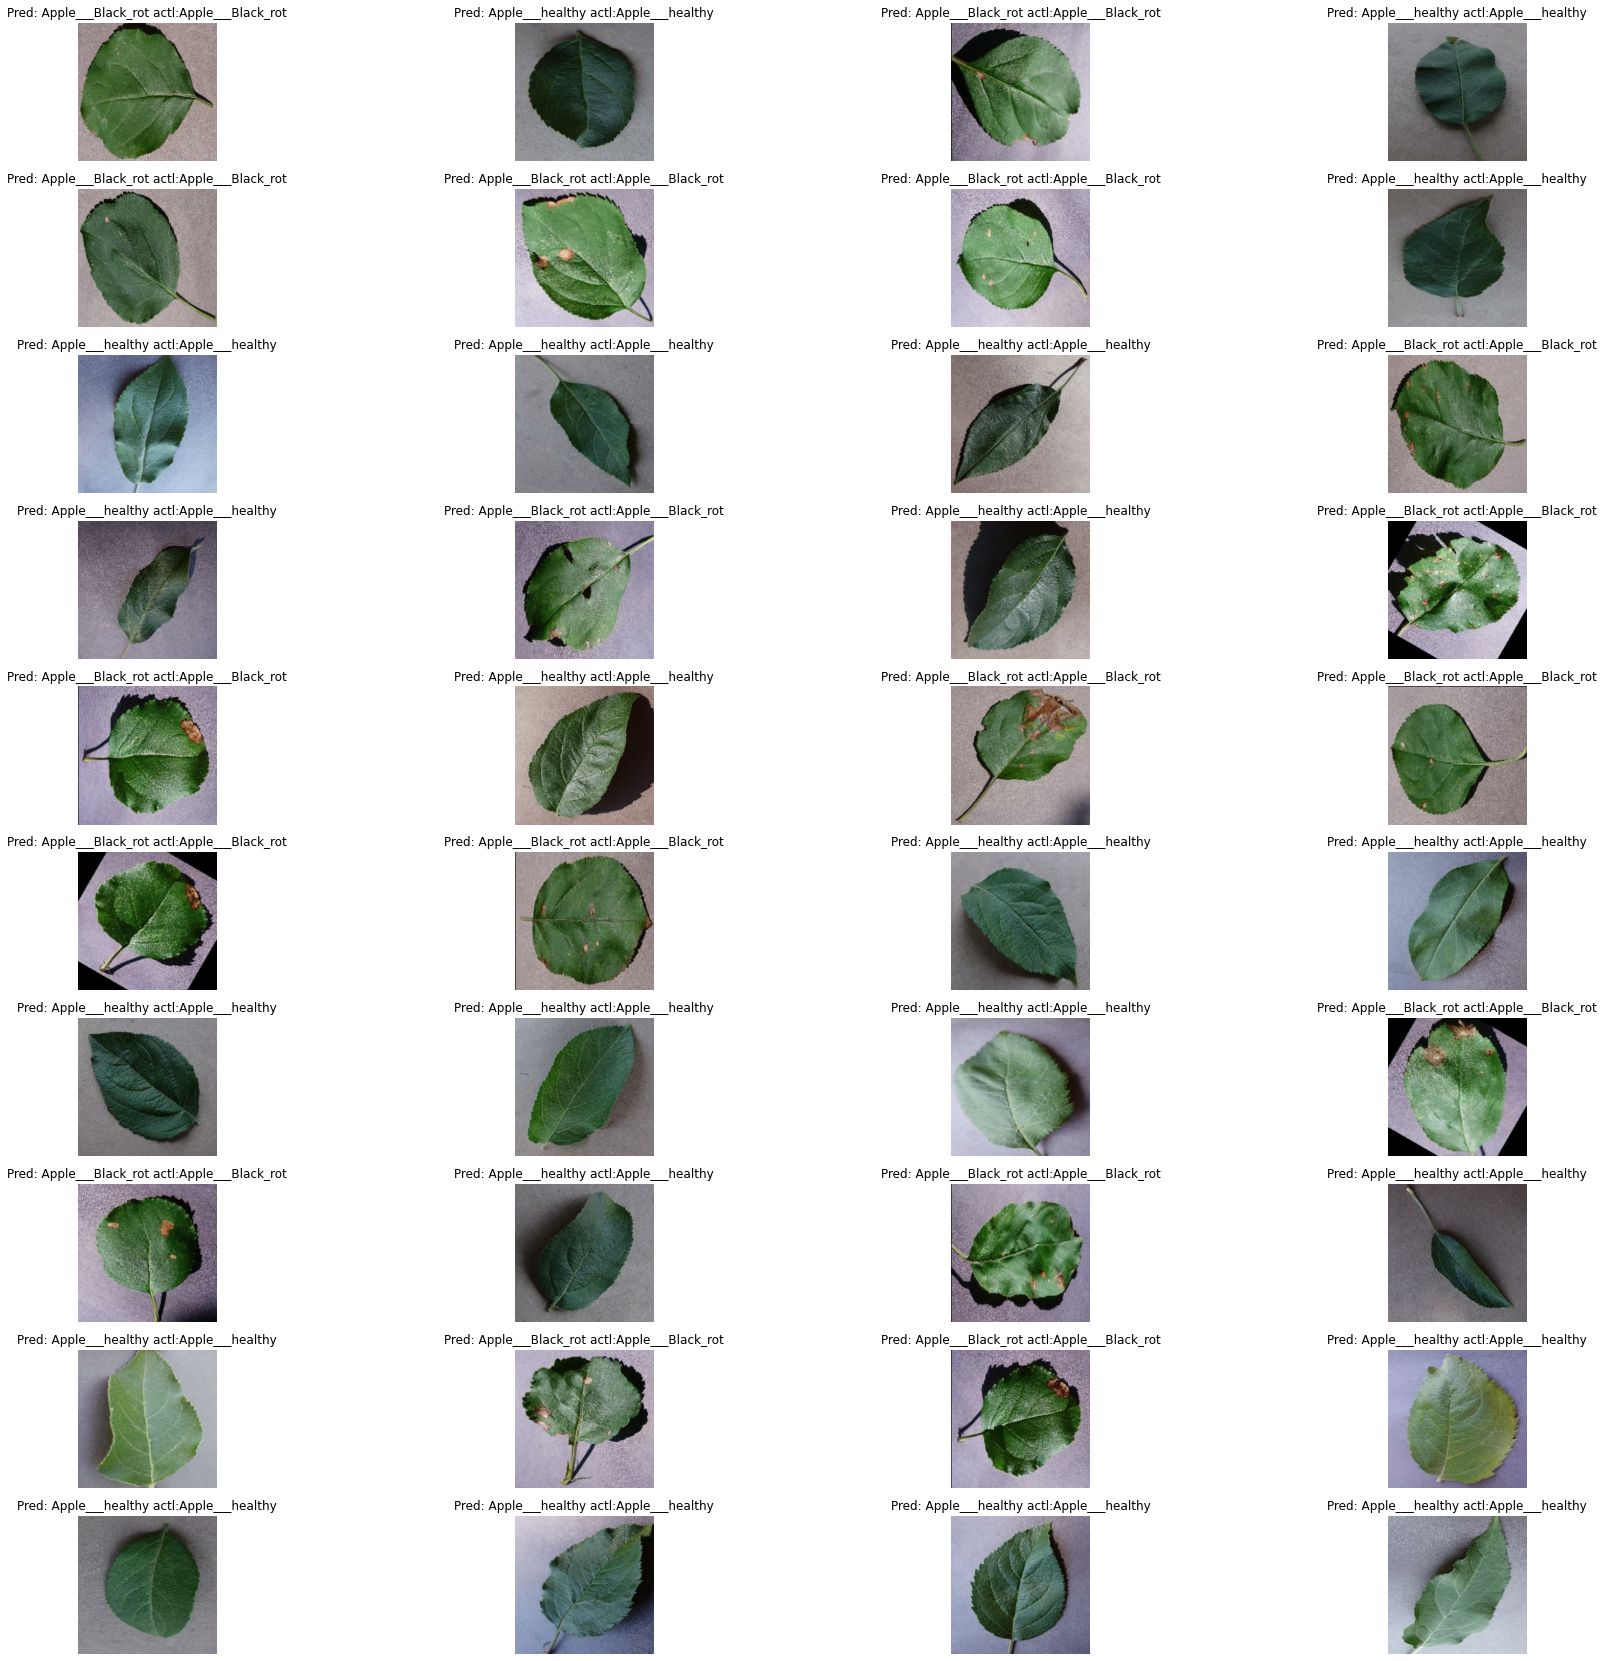

In [25]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyPrunnedModel.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)